In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-fight/360_F_625492639_efK5z3FANog7eMMDDnrExmFiFbu8e0AC.jpg


In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('/kaggle/input/cat-fight/360_F_625492639_efK5z3FANog7eMMDDnrExmFiFbu8e0AC.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original = img.copy()
pixels = img.reshape((-1, 3))

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [8]:
segmented = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
segmented_img = segmented.reshape(img.shape)

In [9]:
gray = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2GRAY)

In [10]:
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [12]:
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 200:  # Filter out tiny noise boxes
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(original, (x, y), (x + w, y + h), (255, 0, 0), 2) 

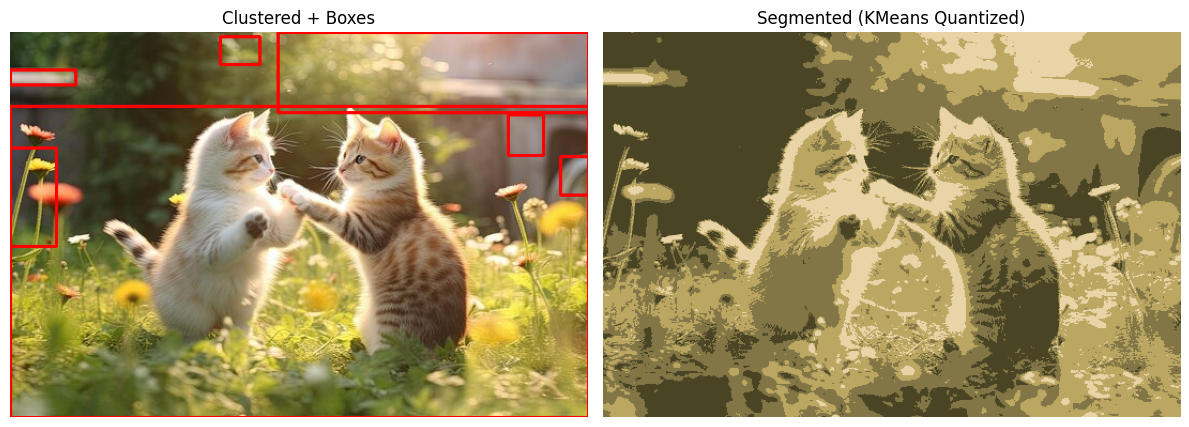

In [14]:
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Clustered + Boxes")
plt.imshow(original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented (KMeans Quantized)")
plt.imshow(segmented_img)
plt.axis('off')

plt.tight_layout()
plt.show()

# to find the optimal k value

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, Silhouette Score=0.5143


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, Silhouette Score=0.4515


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, Silhouette Score=0.4141


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, Silhouette Score=0.4206


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, Silhouette Score=0.4033


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, Silhouette Score=0.3789


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, Silhouette Score=0.3679


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, Silhouette Score=0.3596


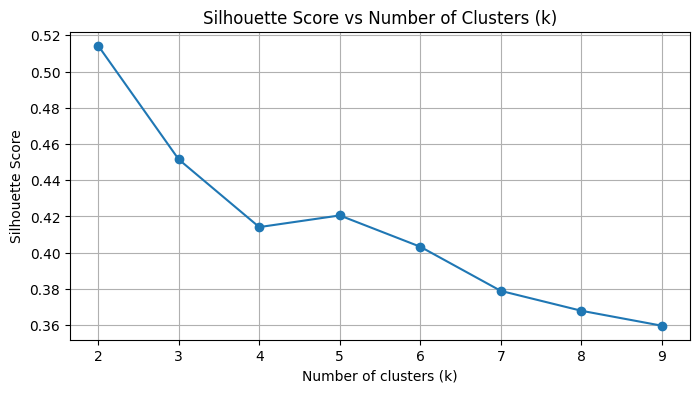

In [15]:
# Range of k values
k_values = range(2, 10)  # You can go higher if needed
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixels)
    score = silhouette_score(pixels, labels, sample_size=10000, random_state=42)  # Subsample for speed
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# to keep distinct  and broad segments we use k =2

#  k =3,4 for more granular results i.e background ,different cat features etc

# For k = 2

In [16]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [17]:
segmented = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')
segmented_img = segmented.reshape(img.shape)
gray = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

In [19]:
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 200:  # Filter out tiny noise boxes
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(original, (x, y), (x + w, y + h), (255, 0, 0), 2) 

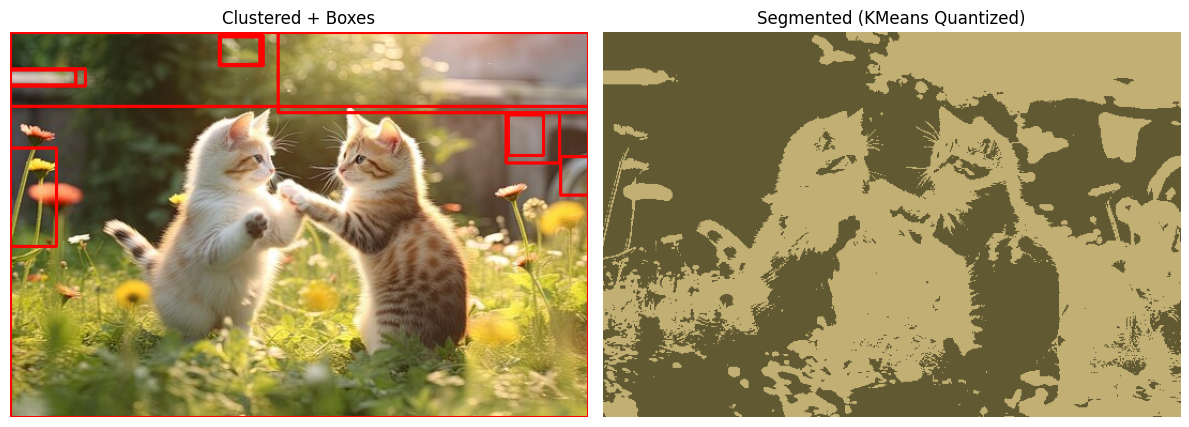

In [21]:
# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Clustered + Boxes")
plt.imshow(original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented (KMeans Quantized)")
plt.imshow(segmented_img)
plt.axis('off')

plt.tight_layout()
plt.show()